# Red Neuronal CNN 
Universidad del Valle de Guatemala
Pablo Gonzalez 20362
Javier Mombiela 20067

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
import os
from matplotlib.image import imread

### Carga de datos

In [5]:
directorio = './data'
os.listdir(directorio)

['entrenamiento.p', 'prueba.p', 'validacion.p']

In [6]:
ruta_entrenamiento = directorio + '/entrenamiento.p'
ruta_test = directorio + '/prueba.p'
ruta_validacion = directorio + '/validacion.p'

In [8]:
test_data = pd.read_pickle(ruta_test)
validation_data = pd.read_pickle(ruta_validacion)
train_data = pd.read_pickle(ruta_entrenamiento)

In [13]:
print(test_data)

{'sizes': array([[53, 54],
       [42, 45],
       [48, 52],
       ...,
       [29, 29],
       [48, 49],
       [32, 31]], dtype=uint8), 'coords': array([[ 6,  5, 48, 49],
       [ 5,  5, 36, 40],
       [ 6,  6, 43, 47],
       ...,
       [ 6,  6, 24, 24],
       [ 5,  6, 43, 44],
       [ 6,  5, 27, 26]], dtype=uint8), 'features': array([[[[116, 139, 174],
         [116, 137, 171],
         [118, 138, 172],
         ...,
         [ 98, 114, 143],
         [ 97, 121, 147],
         [ 85, 105, 130]],

        [[115, 142, 176],
         [115, 140, 174],
         [117, 141, 175],
         ...,
         [119, 143, 176],
         [120, 141, 173],
         [120, 139, 171]],

        [[117, 141, 174],
         [117, 142, 175],
         [114, 140, 172],
         ...,
         [120, 144, 179],
         [122, 144, 179],
         [120, 143, 177]],

        ...,

        [[117, 137, 167],
         [115, 134, 164],
         [117, 135, 164],
         ...,
         [115, 137, 169],
         [116,

### Imagenes de entrenamiento

In [31]:
train_images = train_data['features']
test_images = test_data['features']
valid_images = validation_data['features']

labels = train_data['labels']
labels2 = test_data['labels']
labels3 = validation_data['labels']

Cantidad de etiquetas en el dataset

In [32]:

num_unique_labels = len(set(labels))
print("Número de etiquetas únicas:", num_unique_labels)

num_unique_labels2 = len(set(labels2))
print("Número de etiquetas únicas:", num_unique_labels2)

num_unique_labels3 = len(set(labels3))
print("Número de etiquetas únicas:", num_unique_labels3)

Número de etiquetas únicas: 43
Número de etiquetas únicas: 43
Número de etiquetas únicas: 43


Forma de los datos

In [17]:
labels.shape

(34799,)

In [18]:
train_images.shape

(34799, 32, 32, 3)

In [26]:
test_images.shape

(12630, 32, 32, 3)

In [29]:
valid_images.shape

(4410, 32, 32, 3)

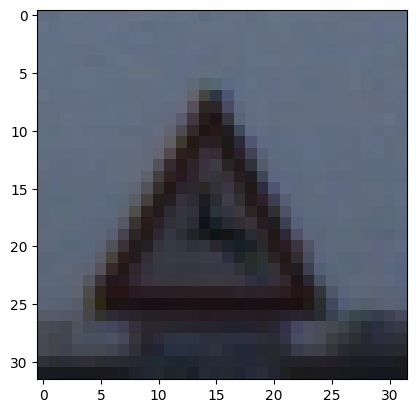

In [22]:
img_para = train_images[600]
plt.imshow(img_para)

In [ ]:
modelo = Sequential()

modelo.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = forma_imagen, activation = 'relu',))
modelo.add(MaxPooling2D(pool_size = (2, 2)))

modelo.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape = forma_imagen, activation = 'relu',))
modelo.add(MaxPooling2D(pool_size = (2, 2)))

modelo.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape = forma_imagen, activation = 'relu',))
modelo.add(MaxPooling2D(pool_size = (2, 2)))


modelo.add(Flatten())


modelo.add(Dense(128))
modelo.add(Activation('relu'))

# Dropouts ayudan a reducir el sobre ajuste al ir "apagando" unidades al azar durante el entrenamiento.
# Aquí estamos indicando que al azar apague el 50% de las unidades.
modelo.add(Dropout(0.5))

# La última capa, recordamos que es binaria por lo que selecionamos sigmoid
modelo.add(Dense(1))
modelo.add(Activation('sigmoid'))

modelo.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])